# Data Exploration & Analysis of the Lehman Baseball Database
## http://seanlahman.com/baseball-archive/statistics

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from copy import copy
from collections import namedtuple
import datetime as dt
from datetime import date
from datetime import datetime
from IPython.display import Image
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### The data consists of over a dozen CSV files.  They offer a MySQL version but let's see if we can get away without that.

In [25]:
from os import listdir
from os.path import isfile, join
path = 'baseballdatabank-master/core/'
files = [f for f in listdir(path) if isfile(join(path, f)) and f[len(f) - 3:] == 'csv']
print(files)

dfs = {}
for f in files:
    dfs[f] = pd.read_csv(path + f)
    print(f)
    print(dfs[f].columns)

['TeamsHalf.csv', 'AwardsShareManagers.csv', 'AwardsPlayers.csv', 'Batting.csv', 'TeamsFranchises.csv', 'Appearances.csv', 'PitchingPost.csv', 'Pitching.csv', 'Schools.csv', 'AllstarFull.csv', 'FieldingOF.csv', 'FieldingPost.csv', 'Teams.csv', 'Salaries.csv', 'AwardsManagers.csv', 'HomeGames.csv', 'ManagersHalf.csv', 'SeriesPost.csv', 'Fielding.csv', 'Parks.csv', 'HallOfFame.csv', 'Managers.csv', 'BattingPost.csv', 'AwardsSharePlayers.csv', 'Master.csv', 'CollegePlaying.csv']
TeamsHalf.csv
Index([u'yearID', u'lgID', u'teamID', u'Half', u'divID', u'DivWin', u'Rank',
       u'G', u'W', u'L'],
      dtype='object')
AwardsShareManagers.csv
Index([u'awardID', u'yearID', u'lgID', u'playerID', u'pointsWon', u'pointsMax',
       u'votesFirst'],
      dtype='object')
AwardsPlayers.csv
Index([u'playerID', u'awardID', u'yearID', u'lgID', u'tie', u'notes'], dtype='object')
Batting.csv
Index([u'playerID', u'yearID', u'stint', u'teamID', u'lgID', u'G', u'AB', u'R',
       u'H', u'2B', u'3B', u'HR', 

# Desired Attributes (df name)
* height (height)
* age at debut (age_debut)
* debut year (debut_year)
* birth location
* bats (r or l)
* throws (r or l)
* years of school
* position played most
* number of positions played
* school location
* career year
* OBS
* label

## Master.csv

In [259]:
dfs['Master.csv'].head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


## Height & Weight

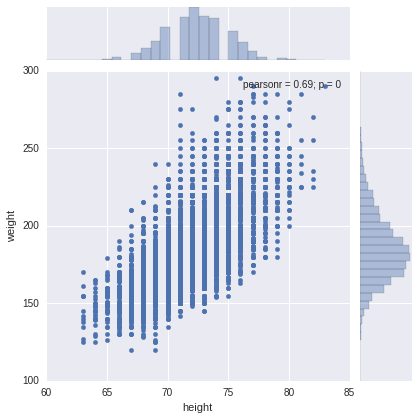

In [3]:
hw = copy(dfs['Master.csv'][['weight','height']])
sns.jointplot(hw['height'], hw['weight'], xlim=(60,85), ylim=(100,300))

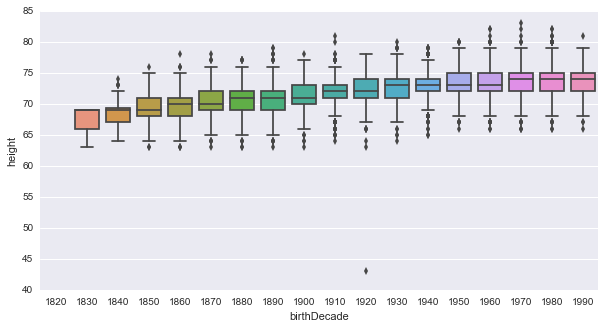

In [272]:
# sns.barplot(h['birthYear'], h['height'])
h = copy(dfs['Master.csv'][['playerID', 'birthYear', 'height']])
d = [str(x)[0:3] + '0' for x in h['birthYear']]
h['birthDecade'] = d
h = h.sort_values(by='birthDecade')
height = h[h['birthDecade'] != 'nan0']
plt.figure(figsize=(10,5))
sns.boxplot(x="birthDecade", y="height", data=height)

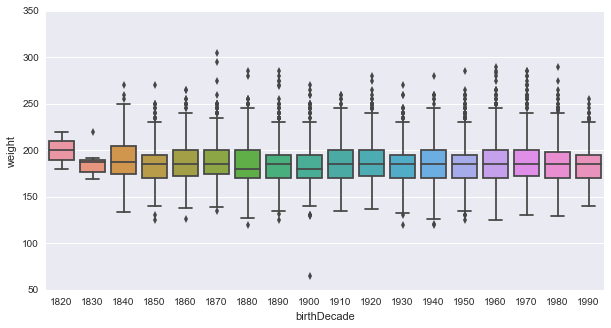

In [274]:
# sns.barplot(h['birthYear'], h['height'])
w = copy(dfs['Master.csv'][['playerID', 'birthYear', 'weight']])
d = [str(x)[0:3] + '0' for x in h['birthYear']]
w['birthDecade'] = d
w = w.sort_values(by='birthDecade')
weight = w[w['birthDecade'] != 'nan0']
plt.figure(figsize=(10,5))
sns.boxplot(x="birthDecade", y="weight", data=weight)

,playerID,birthYear,height,weight,height_2_weight,birthDecade
2794,chadwhe99,1824.0,NaN,NaN,NaN,1820
2650,cartwal99,1820.0,NaN,NaN,NaN,1820
2558,carlle01,1832.0,NaN,NaN,NaN,1830
18672,yeatmbi01,1838.0,NaN,NaN,NaN,1830
13094,pearcdi01,1836.0,63.0,161.0,0.391304,1830


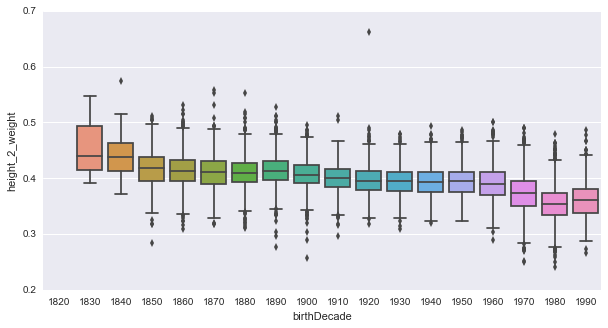

In [282]:
h_w = copy(dfs['Master.csv'][['playerID', 'birthYear', 'height', 'weight']])
h_w['height_2_weight'] = h_w['height'] / h_w['weight']
d = [str(x)[0:3] + '0' for x in h_w['birthYear']]
h_w['birthDecade'] = d
h_w = h_w.sort_values(by='birthDecade')
h_w = h_w[h_w['birthDecade'] != 'nan0']
plt.figure(figsize=(10,5))
sns.boxplot(x="birthDecade", y="height_2_weight", data=h_w)
h_w.head(n=5)

The median height increases over time.  The median weight stays relatively the same.  The height to weight ratio decreases which does not seem to make sense.  It could be explianed by fewer people gaining sigificantly more weight than others.   

In [53]:
h_w_decade = copy(dfs['Master.csv'][['playerID', 'debut', 'height', 'weight']])
#Scatter, the KDE plots just weren't working
h_w_decade['height'] = [x * (1 + random.uniform(-1,1) / 100) for x in h_w_decade['height']]
h_w_decade['weight'] = [x * (1 + random.uniform(-1,1) / 100) for x in h_w_decade['weight']]
h_w_decade = pd.DataFrame([row for idx, row in h_w_decade.iterrows() if type(row.debut) == str])
h_w_decade['debutYear'] = [datetime.strptime(x, '%Y-%m-%d').date().year for x in h_w_decade['debut'] if type(x) == str]
d = [str(x)[0:3] + '0' for x in h_w_decade['debutYear']]
h_w_decade['debutDecade'] = d
h_w_decade = h_w_decade.sort_values(by='debutDecade')
h_w_decade = h_w_decade[h_w_decade['debutDecade'] != 'nan0']

for d in h_w_decade['debutDecade'].unique():
    hwd = h_w_decade[h_w_decade['debutDecade'] == d]
    sns_plot = sns.jointplot(hwd['height'], 
                         hwd['weight'], kind='scatter', 
                         xlim=(60,85), ylim=(100,300))
    sns_plot.fig.text(0.65, 0.72, d + 's', fontsize=20, rotation=0)
    sns_plot.savefig('height_weight' + d + '.png')
    plt.close()

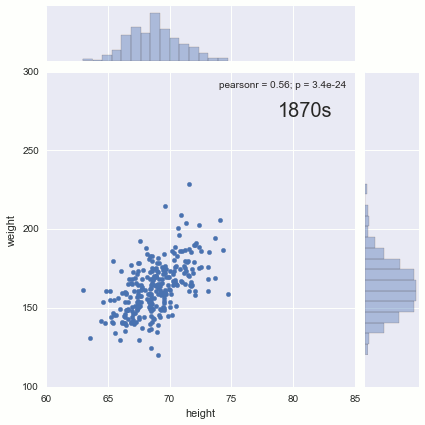

In [356]:
Image(filename='weight_height_animation.png')

Starting around 1990 we see larger gains in weight than height.  Let's examine the hypothesis that the users with a high weight to height ratio are users of PEDs. In the below distribution any play who ever tested positive for PEDs is colored red.  Looking only at 1990 onward, it does not appear that PED users are produced via an alternate underlying distrobution.  Let's call this inconclusive. We are missing 34 of 119 playeres due to quick and sloppy join.  However the lack on signal suggests it's not worth the time to manually annotate the errors.

Pulled from https://en.wikipedia.org/wiki/List_of_Major_League_Baseball_players_suspended_for_performance-enhancing_drugs

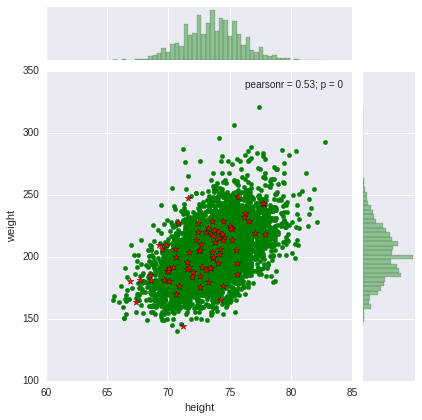

In [80]:
ped = pd.read_csv('known_ped_users.csv', delimiter='\t' )
ped['nameFirst'] = [x.split(' ')[0] for x in ped['name']]
ped['nameLast'] = [x.split(' ')[1] for x in ped['name']]
ped.columns = ['nameGiven', 'team', 'date', 'nameFirst', 'nameLast']
ped_id = ped.merge(copy(dfs['Master.csv']), on=['nameFirst', 'nameLast'])
ped_id = ped_id['playerID'].tolist()

h_w_decade['ped'] = [True if x in ped_id else False for x in h_w_decade['playerID']]
h_w_decade_c = h_w_decade[(h_w_decade['ped'] == False) & (h_w_decade['debutDecade'] >= '1990')]
h_w_decade_d = h_w_decade[(h_w_decade['ped'] == True) & (h_w_decade['debutDecade'] >= '1990')]

graph = sns.jointplot(x=h_w_decade_c.height, y=h_w_decade_c.weight, color='g')
graph.x = h_w_decade_d.height
graph.y = h_w_decade_d.weight
graph.plot_joint(plt.scatter, marker='*', c='r', s=50)

## Age at Debut

In [165]:
ad = copy(dfs['Master.csv'][['playerID', 'birthYear', 'birthMonth', 'birthDay', 'debut']])
d = [str(x)[0:3] + '0' for x in ad['birthYear']]
ad['birthDecade'] = d
ad = ad.sort_values(by='birthDecade')
ad = ad[ad['birthDecade'] != 'nan0']
ad = [row for idx, row in ad.iterrows() if not np.isnan(row.birthDay) 
      and not np.isnan(row.birthMonth) and not np.isnan(row.birthYear)
     and type(row.debut) == str]
ad = pd.DataFrame(ad)
ad['debut'] = [datetime.strptime(x, '%Y-%m-%d').date() for x in ad['debut'] if type(x) == str]
ad['birthYear'] = ad['birthYear'].astype(int)
ad['birthMonth'] = ad['birthMonth'].astype(int)
ad['birthDay'] = ad['birthDay'].astype(int)
ad['birthDate'] = [dt.date(row.birthYear, row.birthMonth, row.birthDay) for idx, row in ad.iterrows()]
ad['age_at_debut'] = [(row.debut - row.birthDate).days for idx, row in ad.iterrows()]
age_debut = ad[ad['age_at_debut'] > 0]
age_debut.head()

,playerID,birthYear,birthMonth,birthDay,debut,birthDecade,birthDate,age_at_debut
2558,carlle01,1832,2,25,1874-09-09,1830,1832-02-25,15537
18672,yeatmbi01,1838,3,10,1872-04-20,1830,1838-03-10,12460
13094,pearcdi01,1836,2,29,1871-05-18,1830,1836-02-29,12862
18605,wrighha01,1835,1,10,1871-05-05,1830,1835-01-10,13264
745,barkeal01,1839,1,18,1871-06-01,1830,1839-01-18,11822


It appears the debut ages aren't correct for at least some of the 1830s

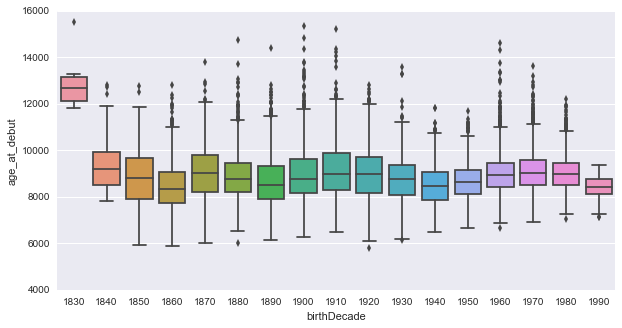

In [166]:
plt.figure(figsize=(10,5))
sns.boxplot(x='birthDecade', y='age_at_debut', data=age_debut)

## Debut Year

In [172]:
debut_year = copy(dfs['Master.csv'][['playerID', 'debut']])
debut_year = pd.DataFrame([row for idx, row in ad.iterrows() if type(row.debut) == str])
debut_year['debut_year'] = [datetime.strptime(x, '%Y-%m-%d').date().year for x in debut_year['debut'] if type(x) == str]
debut_year.head()

,playerID,debut,debut_year
0,aardsda01,2004-04-06,2004
1,aaronha01,1954-04-13,1954
2,aaronto01,1962-04-10,1962
3,aasedo01,1977-07-26,1977
4,abadan01,2001-09-10,2001


In [173]:
ad_grp = debut_year.groupby(by='debut_year').count()
debut_year_cnt = ad_grp.reset_index()
del debut_year_cnt['debut']
debut_year_cnt.columns = ['debut_year', 'count']
debut_year_cnt.head()

,debut_year,count
0,1871,115
1,1872,64
2,1873,33
3,1874,30
4,1875,84


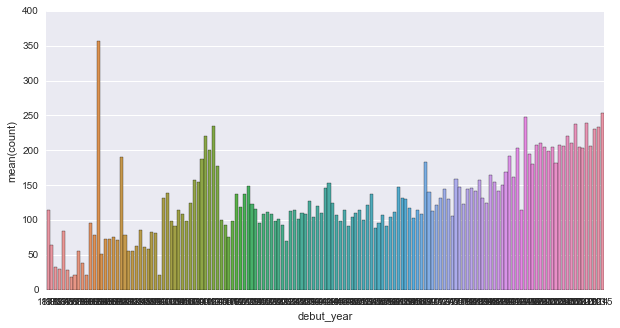

In [174]:
plt.figure(figsize=(10,5))
sns.barplot(debut_year_cnt['debut_year'], debut_year_cnt['count'])

## Birth Location

In [17]:
birth_loc = copy(dfs['Master.csv'][['playerID', 'debut', 'birthCountry', 'birthState']])
birth_loc = pd.DataFrame([row for idx, row in birth_loc.iterrows() if type(row.debut) == str])
birth_loc['debutYear'] = [datetime.strptime(x, '%Y-%m-%d').date().year for x in birth_loc['debut'] if type(x) == str]
d = [str(x)[0:3] + '0' for x in birth_loc['debut']]
birth_loc['debutDecade'] = d
birth_loc = birth_loc.sort_values(by='debutDecade')
birth_loc_data = birth_loc[birth_loc['debutDecade'] != 'nan0']
birth_loc_data.head()

,playerID,debut,birthCountry,birthState,debutYear,debutDecade
11918,morrijo01,1876-04-24,USA,MA,1876,1870
6356,goodmja01,1878-05-02,USA,PA,1878,1870
11573,milleto01,1874-10-24,USA,PA,1874,1870
794,barnibi01,1874-05-07,USA,NY,1874,1870
5202,fergubo01,1871-05-18,USA,NY,1871,1870


In [21]:
birth_loc_cnt = copy(birth_loc_data.groupby(['birthCountry', 'debutDecade']).count())
birth_loc_cnt = birth_loc_cnt.reset_index()
birth_loc_d_cnt = birth_loc.groupby(['debutDecade']).count()
birth_loc_d_cnt = birth_loc_d_cnt.reset_index()
birth_loc_d_cnt = birth_loc_d_cnt[['debutDecade', 'playerID']]
birth_loc_d_cnt.columns = ['debutDecade', 'count']
birth_loc_d_cnt = birth_loc_d_cnt.sort_values('debutDecade')
birth_loc_cnt = birth_loc_cnt.sort_values('debutDecade').reset_index()
birth_loc_cnt = pd.merge(birth_loc_cnt, birth_loc_d_cnt, on='debutDecade')
birth_loc_cnt = birth_loc_cnt[['birthCountry', 'debutDecade', 'playerID', 'count']]
birth_loc_cnt.columns = ['birthCountry', 'debutDecade', 'count', 'count_decade']
birth_loc_cnt['pct'] = birth_loc_cnt['count'] / birth_loc_cnt['count_decade']
birth_loc_cnt.to_csv('baseball_birth_location_pct.csv')
birth_loc_cnt.head()

,birthCountry,debutDecade,count,count_decade,pct
0,USA,1870,382,448,0.852679
1,Ireland,1870,12,448,0.026786
2,Germany,1870,4,448,0.008929
3,Netherlands,1870,1,448,0.002232
4,France,1870,1,448,0.002232


How has the nation of origin changed over time?  Let's examine the proportion of rookies from each county by decade.  Using Tableau for this image to make life easier.

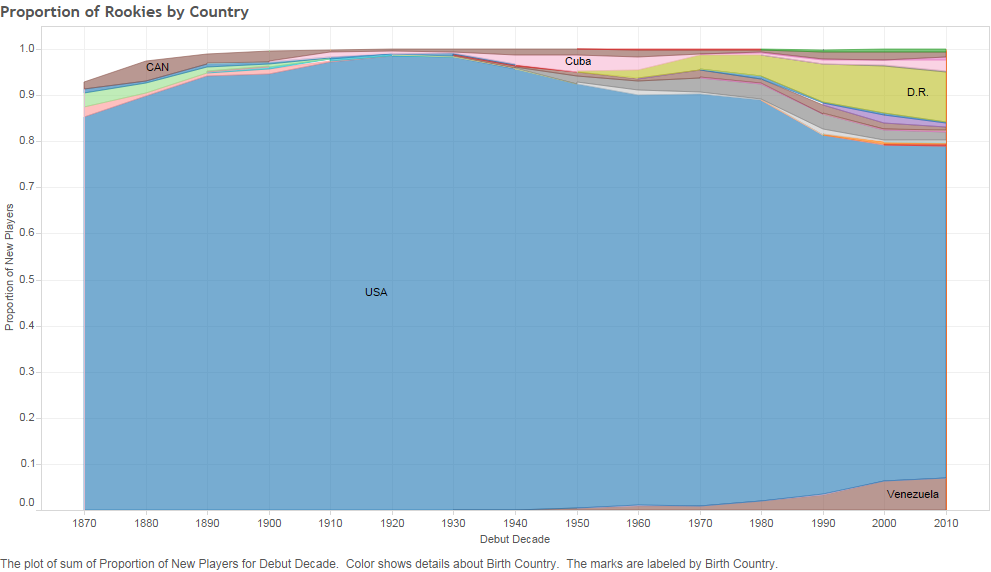

In [77]:
Image(filename='ProportionofRookiesbyCountry.png')

It's doubtful the state date will be as interesting as the country data.  But what if I'm wrong.  Let's have a look.

In [23]:
birth_loc_cnt = copy(birth_loc_data.groupby(['birthState', 'debutDecade']).count())
birth_loc_cnt = birth_loc_cnt.reset_index()
birth_loc_d_cnt = birth_loc.groupby(['debutDecade']).count()
birth_loc_d_cnt = birth_loc_d_cnt.reset_index()
birth_loc_d_cnt = birth_loc_d_cnt[['debutDecade', 'playerID']]
birth_loc_d_cnt.columns = ['debutDecade', 'count']
birth_loc_d_cnt = birth_loc_d_cnt.sort_values('debutDecade')
birth_loc_cnt = birth_loc_cnt.sort_values('debutDecade').reset_index()
birth_loc_cnt = pd.merge(birth_loc_cnt, birth_loc_d_cnt, on='debutDecade')
birth_loc_cnt = birth_loc_cnt[['birthState', 'debutDecade', 'playerID', 'count']]
birth_loc_cnt.columns = ['birthState', 'debutDecade', 'count', 'count_decade']
birth_loc_cnt['pct'] = birth_loc_cnt['count'] / birth_loc_cnt['count_decade']
birth_loc_cnt.to_csv('baseball_birth_state_pct.csv')
birth_loc_cnt.head()

,birthState,debutDecade,count,count_decade,pct
0,Suffolk,1870,1,448,0.002232
1,Worcestershire,1870,1,448,0.002232
2,LA,1870,3,448,0.006696
3,NH,1870,1,448,0.002232
4,La Habana,1870,1,448,0.002232


One-hot warmup, just wait and do all the one-hots together at the end

In [443]:
birth_loc = copy(dfs['Master.csv'][['playerID', 'debut', 'birthCountry', 'birthState']])
le = LabelEncoder()
enc = OneHotEncoder()
birth_loc['birthCountry'] = ['NA' if type(x) != str else x for x in birth_loc['birthCountry']]
birth_loc['birthCountry'] = le.fit_transform(birth_loc['birthCountry'])
birth_loc['birthState'] = ['NA' if type(x) != str else x for x in birth_loc['birthState']]
birth_loc['birthState'] = le.fit_transform(birth_loc['birthState'])
birth_loc[['birthCountry', 'birthState']]

enc.fit(birth_loc[['birthCountry', 'birthState']])

d = enc.transform(birth_loc[['birthCountry', 'birthState']]).toarray()
d.shape, d.sum()

((18846, 299), 37692.0)

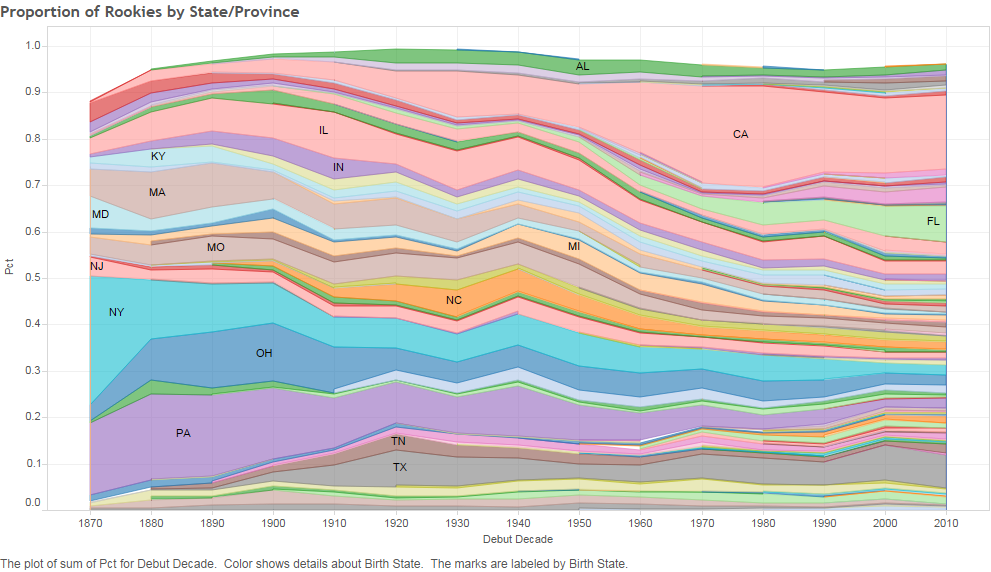

In [79]:
Image(filename='ProportionofRookiesbyStateProvince.png')